In [248]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [249]:
#load dataset
data = pd.read_csv("C:/Users/HP/Downloads/vehicle-1.csv")
data


compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

In [250]:
#column description
data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [251]:
data.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [252]:
data.shape

(846, 19)

In [253]:
#There are 19 columns and 846 rows in the dataset

In [254]:
#attribute datatypes
data.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [255]:
#5 number summary
data.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [256]:
#missing values
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [257]:
#There are missing values present in the dataset 
#So we replace it with the mean of that particular column

In [258]:
data['circularity'].fillna(data['circularity'].median(),inplace=True)
data['distance_circularity'].fillna(data['distance_circularity'].median(),inplace=True)
data['radius_ratio'].fillna(data['radius_ratio'].median(),inplace=True)
data['pr.axis_aspect_ratio'].fillna(data['pr.axis_aspect_ratio'].median(),inplace=True)
data['scatter_ratio'].fillna(data['scatter_ratio'].median(),inplace=True)
data['elongatedness'].fillna(data['elongatedness'].median(),inplace=True)
data['pr.axis_rectangularity'].fillna(data['pr.axis_rectangularity'].median(),inplace=True)
data['skewness_about.2'].fillna(data['skewness_about.2'].median(),inplace=True)
data['skewness_about.1'].fillna(data['skewness_about.1'].median(),inplace=True)
data['skewness_about'].fillna(data['skewness_about'].median(),inplace=True)
data['scaled_radius_of_gyration.1'].fillna(data['scaled_radius_of_gyration.1'].median(),inplace=True)
data['scaled_radius_of_gyration'].fillna(data['scaled_radius_of_gyration'].median(),inplace=True)
data['scaled_variance'].fillna(data['scaled_variance'].median(),inplace=True)
data['scaled_variance.1'].fillna(data['scaled_variance.1'].median(),inplace=True)

In [259]:
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [260]:
#Hence there are no missing values present now

In [261]:
#checking the presence of outliers

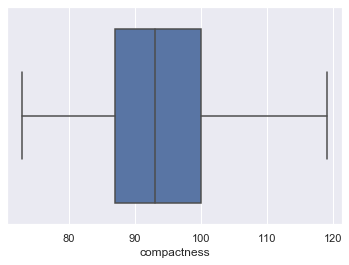

In [262]:
sns.boxplot(data['compactness'])

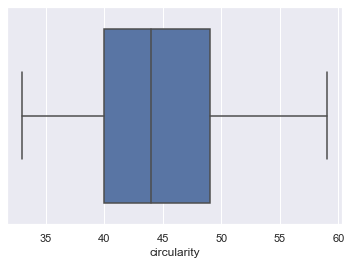

In [263]:
sns.boxplot(data['circularity'])


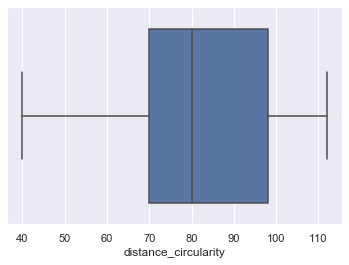

In [264]:
sns.boxplot(data['distance_circularity'])


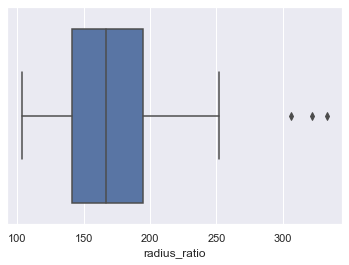

In [265]:
sns.boxplot(data['radius_ratio'])



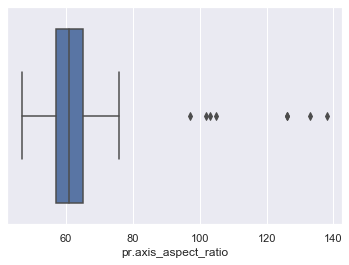

In [266]:
sns.boxplot(data['pr.axis_aspect_ratio'])


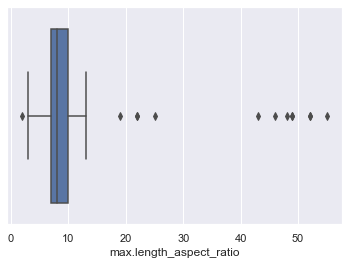

In [267]:
sns.boxplot(data['max.length_aspect_ratio'])


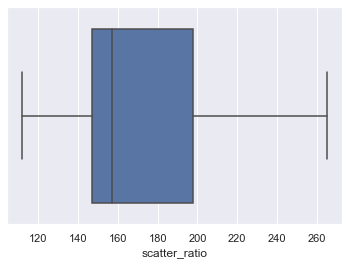

In [268]:
sns.boxplot(data['scatter_ratio'])


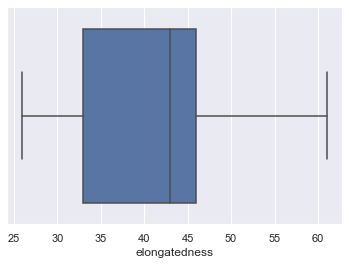

In [269]:
sns.boxplot(data['elongatedness'])


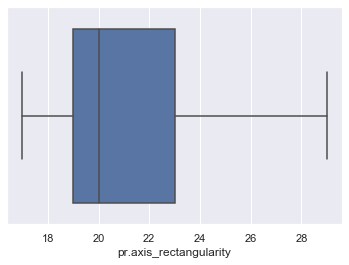

In [270]:
sns.boxplot(data['pr.axis_rectangularity'])


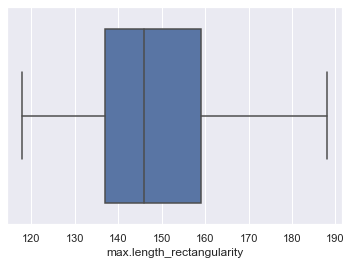

In [271]:
sns.boxplot(data['max.length_rectangularity'])


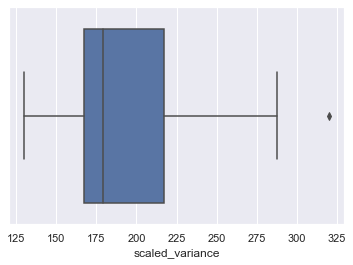

In [272]:
sns.boxplot(data['scaled_variance'])

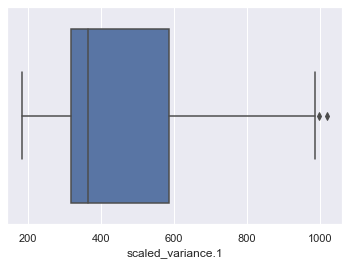

In [273]:
sns.boxplot(data['scaled_variance.1'])

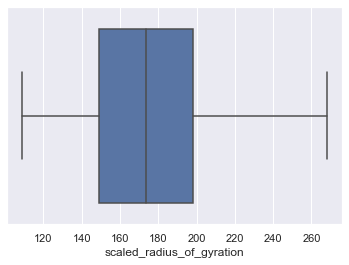

In [274]:
sns.boxplot(data['scaled_radius_of_gyration'])

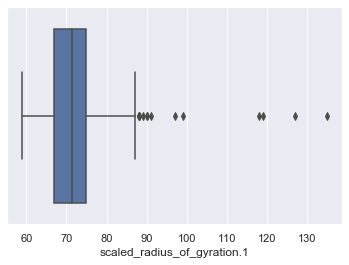

In [275]:
sns.boxplot(data['scaled_radius_of_gyration.1'])

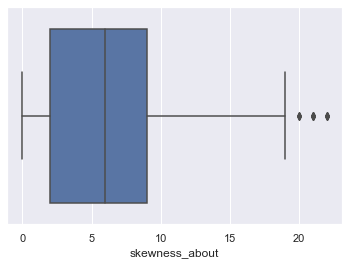

In [276]:
sns.boxplot(data['skewness_about'])

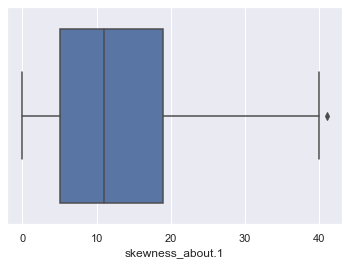

In [277]:
sns.boxplot(data['skewness_about.1'])

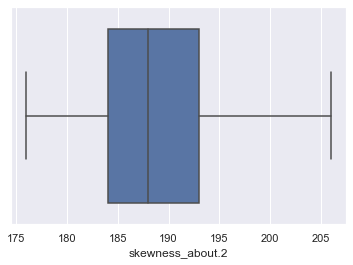

In [278]:
sns.boxplot(data['skewness_about.2'])

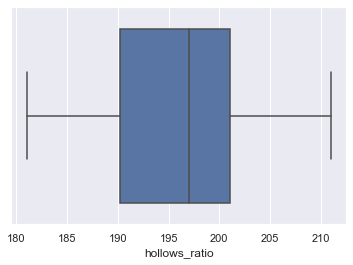

In [279]:
sns.boxplot(data['hollows_ratio'])

In [280]:
#As we can see not all the columns have outliers 
#Very few columns that are 'skewness_about','radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio' and 'scaled_radius_of_gyration.1' have outliers      '

In [281]:
#Replacing the outliers with median

In [282]:
import random as r
d = [r.random()*1000 for i in range(0,100)]
df = pd.DataFrame({'skewness_about': d})

median = df['skewness_about'].median()
std = df['skewness_about'].std()
outliers = (df['skewness_about'] - median).abs() > std
df[outliers] = np.nan
df['skewness_about'].fillna(median, inplace=True)

In [283]:
import random as r
d = [r.random()*1000 for i in range(0,100)]
df = pd.DataFrame({'radius_ratio': d})

median = df['radius_ratio'].median()
std = df['radius_ratio'].std()
outliers = (df['radius_ratio'] - median).abs() > std
df[outliers] = np.nan
df['radius_ratio'].fillna(median, inplace=True)

In [284]:
import random as r
d = [r.random()*1000 for i in range(0,100)]
df = pd.DataFrame({'pr.axis_aspect_ratio': d})

median = df['pr.axis_aspect_ratio'].median()
std = df['pr.axis_aspect_ratio'].std()
outliers = (df['pr.axis_aspect_ratio'] - median).abs() > std
df[outliers] = np.nan
df['pr.axis_aspect_ratio'].fillna(median, inplace=True)

In [285]:
import random as r
d = [r.random()*1000 for i in range(0,100)]
df = pd.DataFrame({'max.length_aspect_ratio': d})

median = df['max.length_aspect_ratio'].median()
std = df['max.length_aspect_ratio'].std()
outliers = (df['max.length_aspect_ratio'] - median).abs() > std
df[outliers] = np.nan
df['max.length_aspect_ratio'].fillna(median, inplace=True)

In [286]:
import random as r
d = [r.random()*1000 for i in range(0,100)]
df = pd.DataFrame({'scaled_radius_of_gyration.1': d})

median = df['scaled_radius_of_gyration.1'].median()
std = df['scaled_radius_of_gyration.1'].std()
outliers = (df['scaled_radius_of_gyration.1'] - median).abs() > std
df[outliers] = np.nan
df['scaled_radius_of_gyration.1'].fillna(median, inplace=True)

In [287]:
#to check the distribution of the dependent variable: class column

data["class"].value_counts(normalize=True) 

car    0.507092
bus    0.257683
van    0.235225
Name: class, dtype: float64

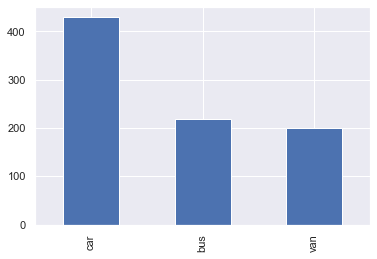

In [288]:
#visualizing the distribution of target column
pd.value_counts(data["class"]).plot(kind="bar")

In [289]:
#we can clearly see that the number of cars are relatively higher in number(around 51%)
#The rest 50 is equally divided into the category bus and van(26 and 23 respecively)

In [290]:
data.groupby(["class"]).count() 

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            218          218                   218           218   
car            429          429                   429           429   
van            199          199                   199           199   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     218                      218            218   
car                     429                      429            429   
van                     199                      199            199   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              218                     218                        218   
car              429                     429                        429   
van              199                     199                        199   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus                218                218                        218   
car                429                429                        429   
van                199                199                        199   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                            218             218               218   
car                            429             429               429   
van                            199             199               199   

       skewness_about.2  hollows_ratio  
class                                   
bus                 218            218  
car                 429            429  
van                 199            199

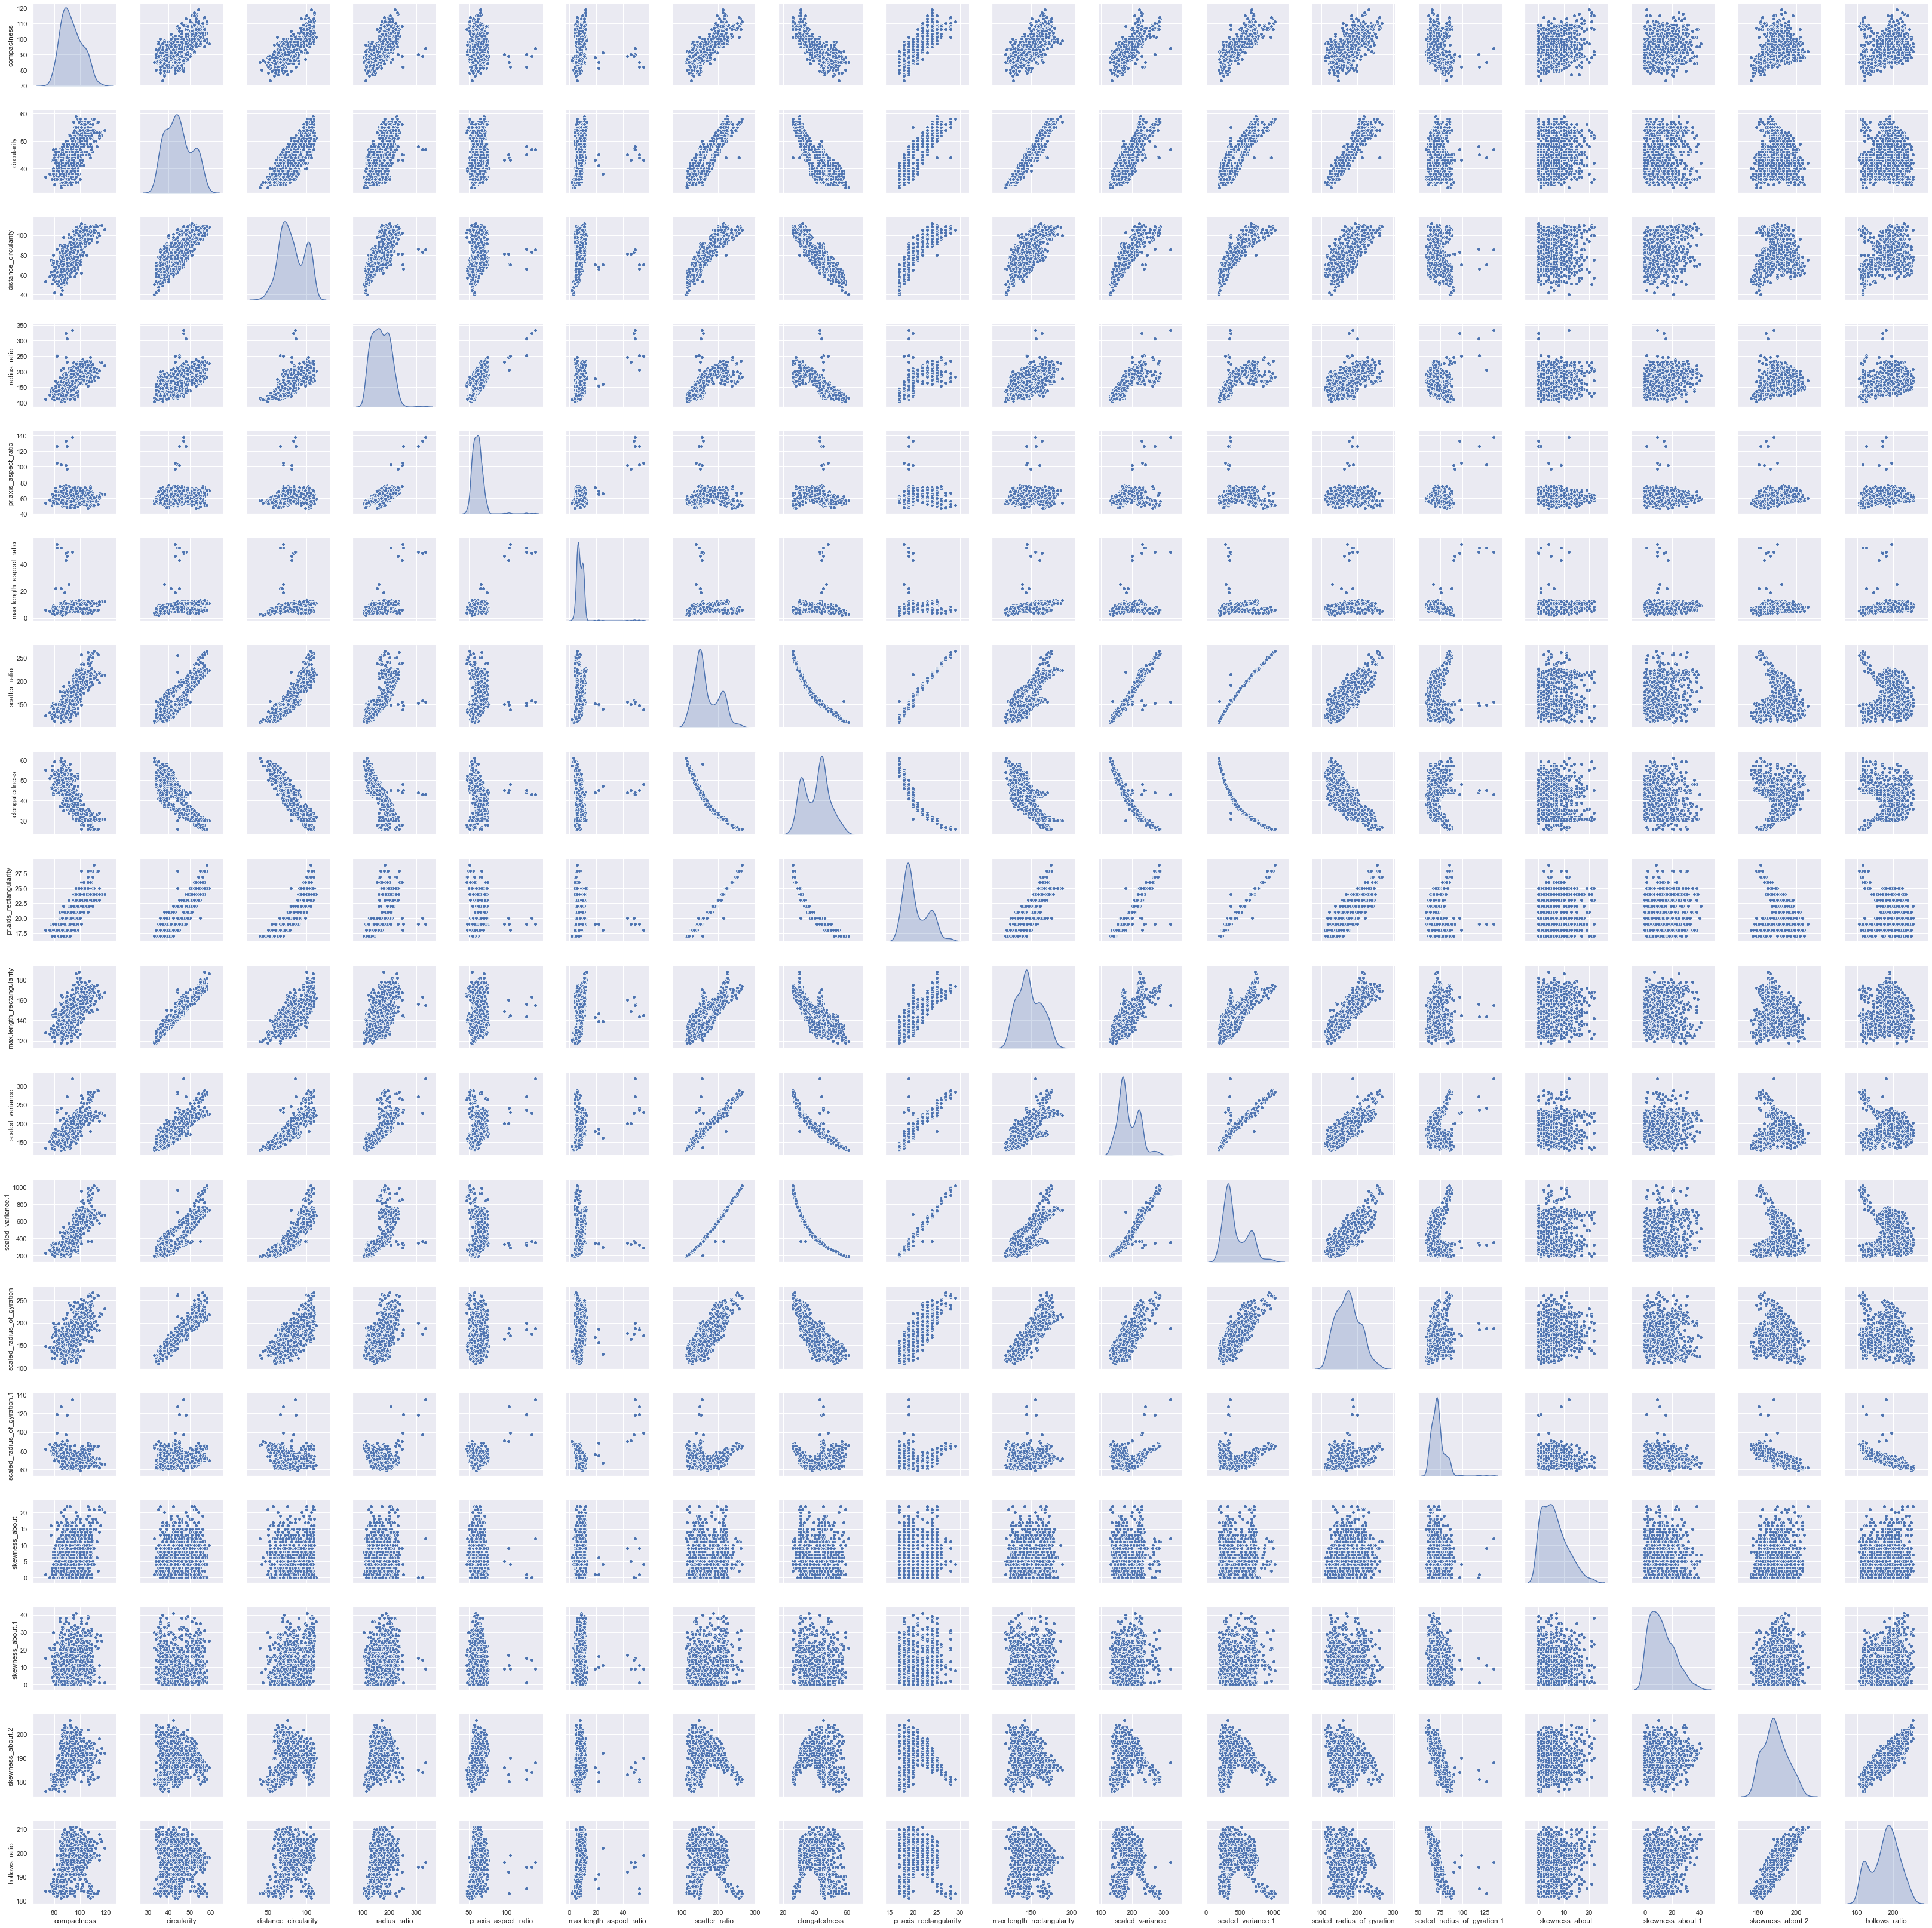

In [291]:
#using pairplot to check the relationship between data
sns.pairplot(data, diag_kind="kde")

In [292]:
#Some attributes have a strong postive relationship with each other as we can see in the graph.
#In addition there are few variables which generate a very distributed scatter plot which means there is no significant relationship at all.

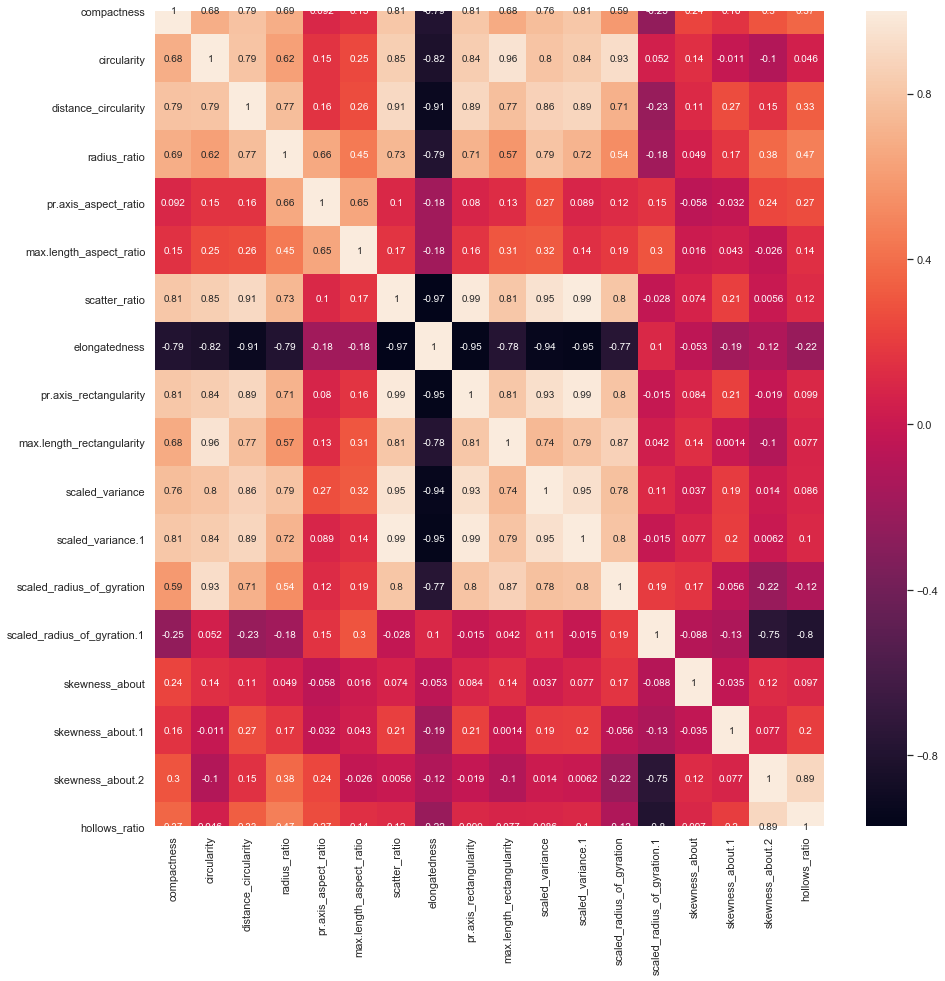

In [293]:
#using heatmap to check the correlation between different datatypes

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

In [294]:
# The last five columns do not seem to have a strong positive correlation between them though hollows ratio and skweness about 2 have correrelation of 0.89.
# The other attributes have good correrelation with each other as we can see in the heat map.

In [295]:
# Standardisating of data using z score

df = data.drop('class', axis=1)

In [296]:
from scipy.stats import zscore
df_z= df.apply(zscore)

In [297]:
df_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [358]:
#Splitting the data into test and train set

from sklearn.model_selection import train_test_split

X,y = np.array(data)[ :, 0:18], np.array(data['class'])[:]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [359]:
#Checking the split of data

print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

69.98% data is in training set
30.02% data is in test set


In [360]:
print(x_train.shape)
print(y_train.shape)

(592, 18)
(592,)


In [361]:
#Support Vector Machine

In [362]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

In [363]:
from sklearn import svm
clr = svm.SVC()
clr.fit(x_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [364]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x]== predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [365]:
y_pred = clr.predict(x_test)

In [366]:
getAccuracy(y_test, y_pred)

52.75590551181102

In [367]:
# K Fold cross validation

In [368]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

array = data.values
X2 = array[:,0:18]
Y2 = array[:,18]

X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size=0.50, random_state=1)

num_folds = 10
seed = 10

kfold = KFold(n_splits=num_folds, random_state=seed)
model = DecisionTreeRegressor()
results = cross_val_score(model, X2, Y2, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.73463016 0.79868421 0.76305119 0.78834661 0.57043588 0.65702757
 0.62844505 0.67557129 0.81798483 0.64091603]
Accuracy: 70.751% (7.995%)


In [369]:
#PCA

In [370]:
covMatrix = np.cov(df_z,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [371]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)
pca.fit(df_z)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [372]:
print(pca.explained_variance_)

[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]


In [373]:
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [374]:
print(pca.explained_variance_ratio_)

[5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.52109243e-03 1.14194232e-03 9.94191854e-04
 5.56329946e-04 1.64497408e-04]


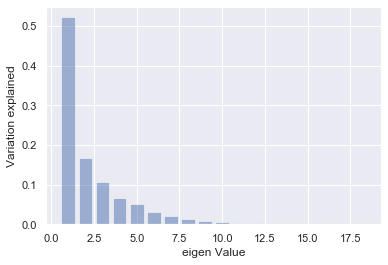

In [375]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

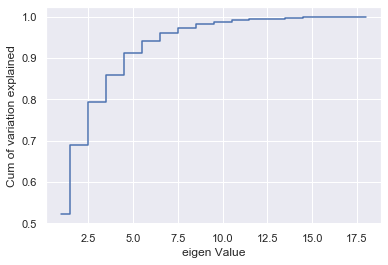

In [376]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [377]:
#we can see there is a sharp elbow around x=6so we take n_components =6
#Dimensionality reduction

In [378]:
pca2 = PCA(n_components=6)
pca2.fit(df_z)
print(pca2.components_)
print(pca2.explained_variance_ratio_)
Xpca = pca2.transform(df_z)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [379]:
Xpca

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00,
         1.76612370e-01,  7.93007079e-02, -7.57446693e-01],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01,
         2.33234117e-01,  6.93948582e-01, -5.17161832e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02,
         1.20221219e+00,  7.31732265e-01,  7.05041037e-01],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01,
         2.95652324e-01, -1.34423635e+00, -2.17069763e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01,
        -1.93367514e+00,  4.27680051e-02, -4.02491279e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01,
        -1.22480708e+00, -5.40510368e-02, -3.35637136e-01]])

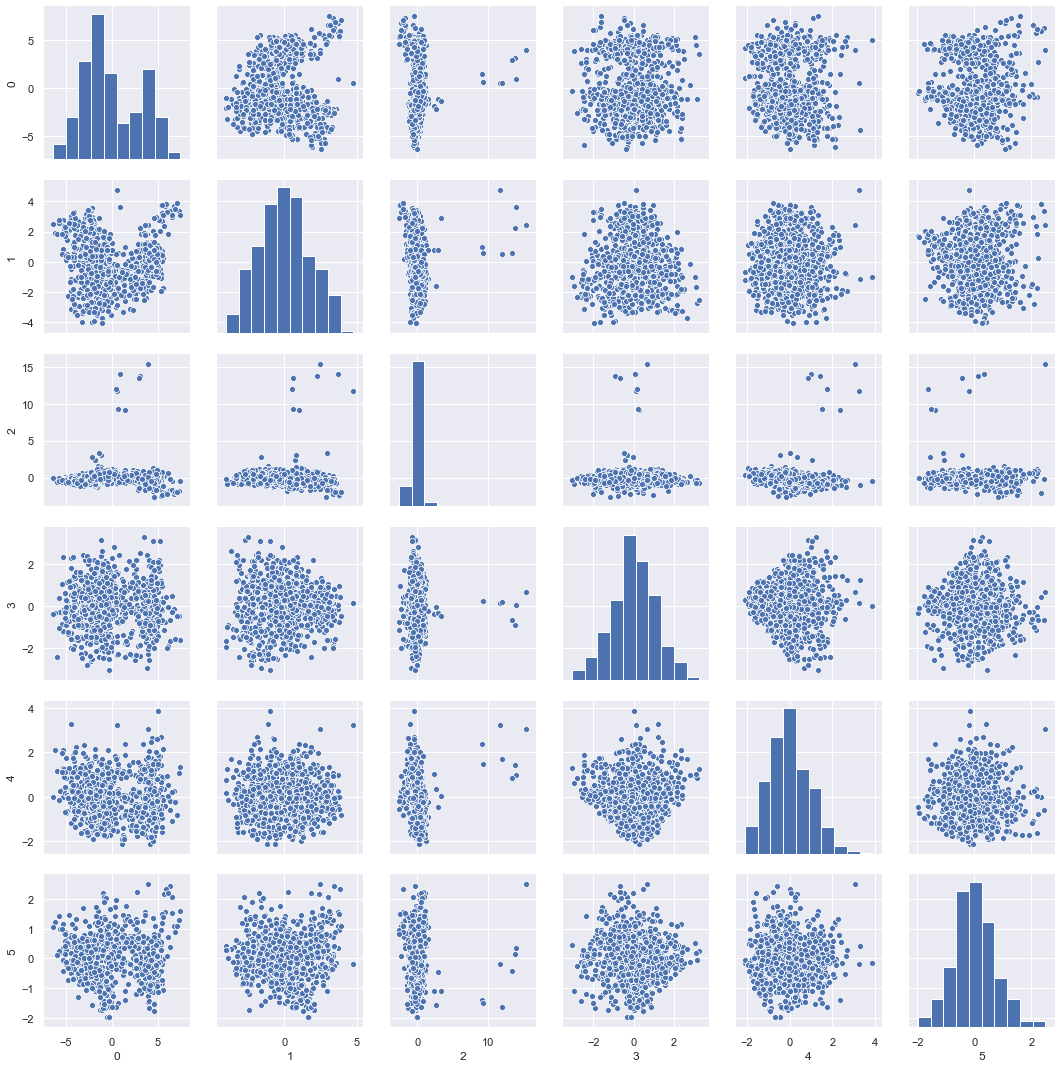

In [380]:
sns.pairplot(pd.DataFrame(Xpca))

In [381]:
#Repeating 3,4,5 steps

In [382]:
#Splitting pca data into train and test

In [383]:
X,y = np.array(Xpca)[ :, 0:6], np.array(data['class'])[:]  #Note that the X variable contains PCA data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [384]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

69.98% data is in training set
30.02% data is in test set


In [385]:
#Implementing svm on pca data

In [386]:
clf = svm.SVC ()
clf.fit(x_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [387]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x]== predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [388]:
y_pred = clf.predict(x_test)

In [389]:
getAccuracy(y_test , y_pred)

86.61417322834646

In [390]:
#K Fold cross validation on pca data

In [391]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

num_folds = 10
seed = 7


kfold = KFold(n_splits=num_folds, random_state=seed)
regression_model = DecisionTreeRegressor()
results = cross_val_score(regression_model, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.59173871 0.32894737 0.52610238 0.6190239  0.43619709 0.54270343
 0.1425655  0.29707113 0.34019502 0.4870229 ]
Accuracy: 43.116% (14.341%)


In [392]:
#We can improve the accuracy of the svm and kfold after performing pca on the dataset